In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_excel

In [12]:
#sensor data
df=pd.read_csv("sensor9ab_for_project1.csv")
df.head()

,Unnamed: 0,created_at,entry_id,PM1.0_CF_ATM_ug.m3,PM2.5_CF_ATM_ug.m3,PM10.0_CF_ATM_ug.m3,UptimeMinutes,ADC,Temperature_F,Humidity_.,PM2.5_CF_1_ug.m3,PM1.0_CF_ATM_ug.m3.b,PM2.5_CF_ATM_ug.m3.b,PM10.0_CF_ATM_ug.m3.b,PM2.5_CF_1_ug.m3.b
0,1,2018-01-24 17:56:00,40,1.84,2.03,2.29,5,-79,79.0,15.0,2.03,1.80,2.46,2.71,2.46
1,2,2018-01-24 17:58:00,42,1.95,2.08,2.08,8,-79,79.0,15.0,2.08,2.22,2.97,3.20,2.97
2,3,2018-01-24 18:02:00,43,1.00,2.02,2.45,12,-78,80.0,14.0,2.02,1.46,1.97,2.26,1.97
3,4,2018-01-24 18:04:00,44,0.95,1.11,1.82,13,-79,80.0,14.0,1.11,0.24,1.17,1.37,1.17
4,5,2018-01-24 18:06:00,46,0.66,1.58,1.58,16,-82,80.0,14.0,1.58,0.59,1.07,1.07,1.07


In [70]:
data=df

#change the format of date and time column
data["created_at"] = pd.to_datetime(data["created_at"])#.dt.date

#change timezone from UTC to Los Angeles time
data["created_at"] = data["created_at"].dt.tz_localize("UTC").dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)


#November data
#subsetting the dataframe one week before and one week after the wildfire
mask = (data['created_at'] > "2018-11-01") & (data['created_at'] <= "2018-11-20")
sub_data=data.loc[mask]

#remove the time part, leave only date
sub_data["created_at"] = pd.to_datetime(sub_data["created_at"]).dt.date
sub_data=sub_data.groupby("created_at").mean()


#compare data
#subsetting the dataframe one week before and one week after the wildfire
mask = (data['created_at'] > "2018-03-01") & (data['created_at'] <= "2018-03-30")
sub_data2=data.loc[mask]

#remove the time part, leave only date
sub_data2["created_at"] = pd.to_datetime(sub_data2["created_at"]).dt.date
sub_data2=sub_data2.groupby("created_at").mean()


sub_data.head(20)




/Users/amy/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/amy/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,entry_id,PM1.0_CF_ATM_ug.m3,PM2.5_CF_ATM_ug.m3,PM10.0_CF_ATM_ug.m3,UptimeMinutes,ADC,Temperature_F,Humidity_.,PM2.5_CF_1_ug.m3,PM1.0_CF_ATM_ug.m3.b,PM2.5_CF_ATM_ug.m3.b,PM10.0_CF_ATM_ug.m3.b,PM2.5_CF_1_ug.m3.b
created_at,,,,,,,,,,,,,,
2018-11-01,201941.5,304347.140827,31.279716,49.267403,54.772842,304.074935,-80.223514,74.741602,57.771318,39.397506,34.613979,52.853359,57.360672,41.580310
2018-11-02,202736.5,305557.408088,11.912831,17.316642,18.907721,164.560049,-80.401961,75.832108,54.291667,16.283701,13.013051,18.758395,20.034044,17.505821
2018-11-03,203517.5,306759.528150,12.629678,17.839625,19.116783,428.819035,-80.564343,74.514745,56.560322,17.829879,13.745576,19.476515,20.544196,19.453056
2018-11-04,204254.0,307888.255846,18.284498,29.870138,33.238432,1034.215956,-80.958735,72.504814,57.834938,26.747799,20.728707,32.841376,35.735158,28.682063
2018-11-05,204971.5,308974.651130,6.691780,9.887556,10.861427,394.837571,-81.329096,75.552260,17.896893,9.324845,7.405523,10.826638,11.639689,10.076045
2018-11-06,205674.0,310032.955524,22.546958,33.626112,36.801679,252.631277,-80.424677,72.100430,15.682927,24.942841,24.565237,35.950674,38.677145,26.745753
2018-11-07,206373.0,311092.687589,73.483980,109.338659,119.171469,375.433666,-79.991441,68.323823,38.744650,73.583081,81.573466,118.791155,128.008702,79.691940
2018-11-08,207081.0,312166.861538,17.779427,25.912196,28.231734,315.344056,-80.033566,69.110490,32.390210,23.044923,19.730126,28.414867,30.432685,24.666238
2018-11-09,207788.0,313235.442060,6.026567,7.983505,8.683777,475.277539,-80.084406,69.183119,21.793991,7.704292,6.738856,9.086767,9.713419,8.717353


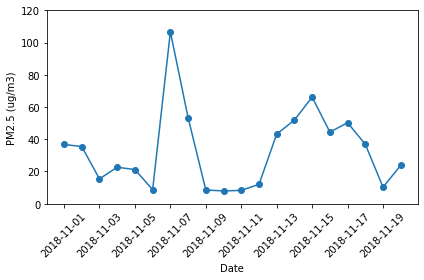

In [69]:
sub_data=sub_data.dropna(how="any")
sub_data=sub_data.reset_index()

PM25_11 = sub_data['PM2.5_CF_ATM_ug.m3']
Date_11=sub_data["created_at"]


plt.plot(Date_11,PM25_11,marker="o")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("PM2.5 (ug/m3)")
plt.ylim(0,120)
plt.tight_layout()
plt.savefig('air_nov.png',dpi=1000)






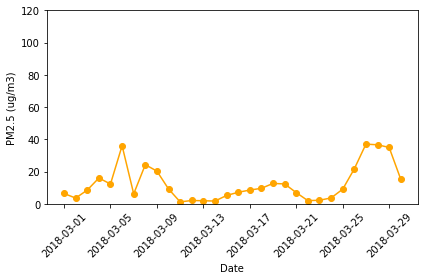

In [71]:
sub_data2=sub_data2.dropna(how="any")
sub_data2=sub_data2.reset_index()

PM25_3 = sub_data2['PM2.5_CF_ATM_ug.m3']
Date_3=sub_data2["created_at"]
plt.plot(Date_3,PM25_3,color="orange",marker="o")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("PM2.5 (ug/m3)")
plt.ylim(0,120)

plt.tight_layout()
plt.savefig('air_mar.png',dpi=1000)